In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import json

submissions_df = pd.read_csv("../data/submissions_with_deltas.csv")
comments_df = pd.read_csv("../data/comments_from_submissions_with_deltas.csv")


In [149]:
comments_df.head()

,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,parent_id_clean,has_delta
0,k3d3suw,16yqq5w,changemyview,t3_16yqq5w,10qxmu,2023-10-04T02:32:48+00:00,This post has been locked due to a large numbe...,{'2024-10-28T14:52:25': 1},False,NaN,16yqq5w,0
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03T17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,16yqq5w,0
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03T16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,16yqq5w,0
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03T15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,16yqq5w,0
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03T14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,16yqq5w,0


In [150]:
# Check if required columns are present
def check_columns(df, required_columns):
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Missing columns in the dataset: {missing_columns}")

Parsing

In [151]:
def parse_json_field(json_str):
    try:
        # Convert string to a dictionary and return the first value
        return list(json.loads(json_str).values())[0]
    except (json.JSONDecodeError, TypeError, ValueError):
        return None  # Return None if parsing fails

In [152]:
# Date Time
from tomlkit import comment

comments_df['created_at'] = pd.to_datetime(comments_df['created_at'], errors='coerce')
submissions_df['created_at'] = pd.to_datetime(submissions_df['created_at'], errors='coerce')

# Create simplified version without seconds
comments_df['simplified_created_at'] = pd.to_datetime(comments_df['created_at'].dt.strftime('%Y-%m-%d %H:%M'))
submissions_df['simplified_created_at'] = pd.to_datetime(submissions_df['created_at'].dt.strftime('%Y-%m-%d %H:%M'))

comments_df['edited'] = comments_df['edited'].astype('bool')
submissions_df['edited'] = submissions_df['edited'].astype('bool')

#Parse JSON
comments_df['score'] = comments_df['score'].apply(parse_json_field)
submissions_df['score'] = submissions_df['score'].apply(parse_json_field)
submissions_df['upvote_ratio'] = submissions_df['upvote_ratio'].apply(parse_json_field)
submissions_df['num_comments'] = submissions_df['num_comments'].apply(parse_json_field)


In [153]:
submissions_df[submissions_df['submission_id']=='16yqq5w']

,submission_id,redditor_id,created_at,title,text,subreddit,permalink,attachment,flair,awards,score,upvote_ratio,num_comments,edited,archived,removed,poll,has_delta,simplified_created_at
0,16yqq5w,e19ujn874,2023-10-03 14:34:24+00:00,CMV: Conservative apathy towards climate chang...,When you ask the average conservative why they...,changemyview,https://www.reddit.com/r/changemyview/comments...,NaN,"{""link"": ""Delta(s) from OP"", ""author"": ""7∆""}","{""list"": null, ""total_awards_count"": 0, ""total...",1318,0.8,991,True,True,False,NaN,1,2023-10-03 14:34:00


In [154]:
comments_df.head()

,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,parent_id_clean,has_delta,simplified_created_at
0,k3d3suw,16yqq5w,changemyview,t3_16yqq5w,10qxmu,2023-10-04 02:32:48+00:00,This post has been locked due to a large numbe...,NaN,False,NaN,16yqq5w,0,2023-10-04 02:32:00
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,NaN,True,NaN,16yqq5w,0,2023-10-03 17:34:00
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,NaN,False,NaN,16yqq5w,0,2023-10-03 16:40:00
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,NaN,True,NaN,16yqq5w,0,2023-10-03 15:32:00
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,NaN,False,NaN,16yqq5w,0,2023-10-03 14:38:00


Submission Analysis:
General statstics


C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\3119017908.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=submissions_df['edited'].value_counts().index, y=submissions_df['edited'].value_counts().values, palette='Blues')
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\3119017908.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=submissions_df['archived'].value_counts().index, y=submissions_df['archived'].value_counts().values, palette='Oranges')
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\3119017908.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

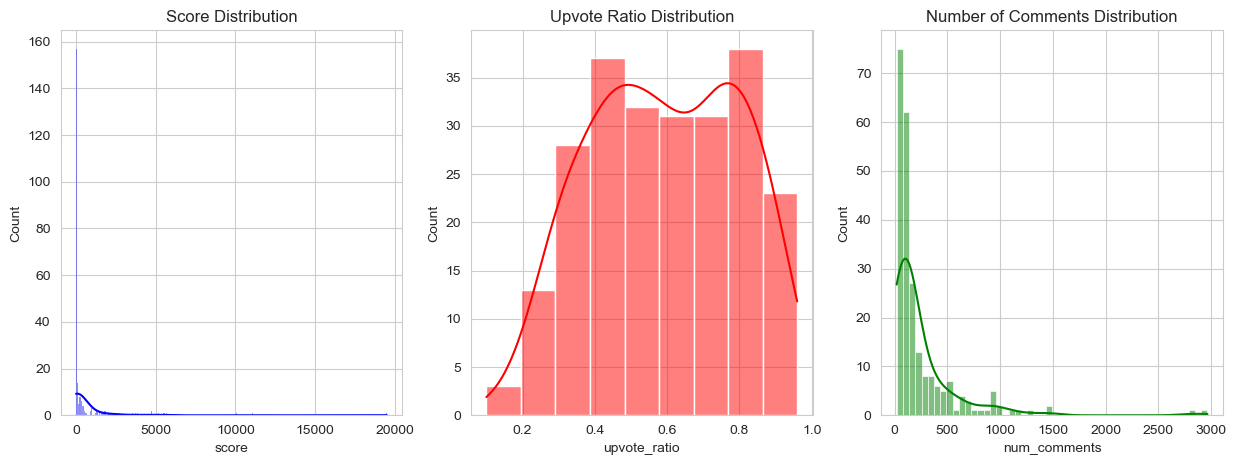

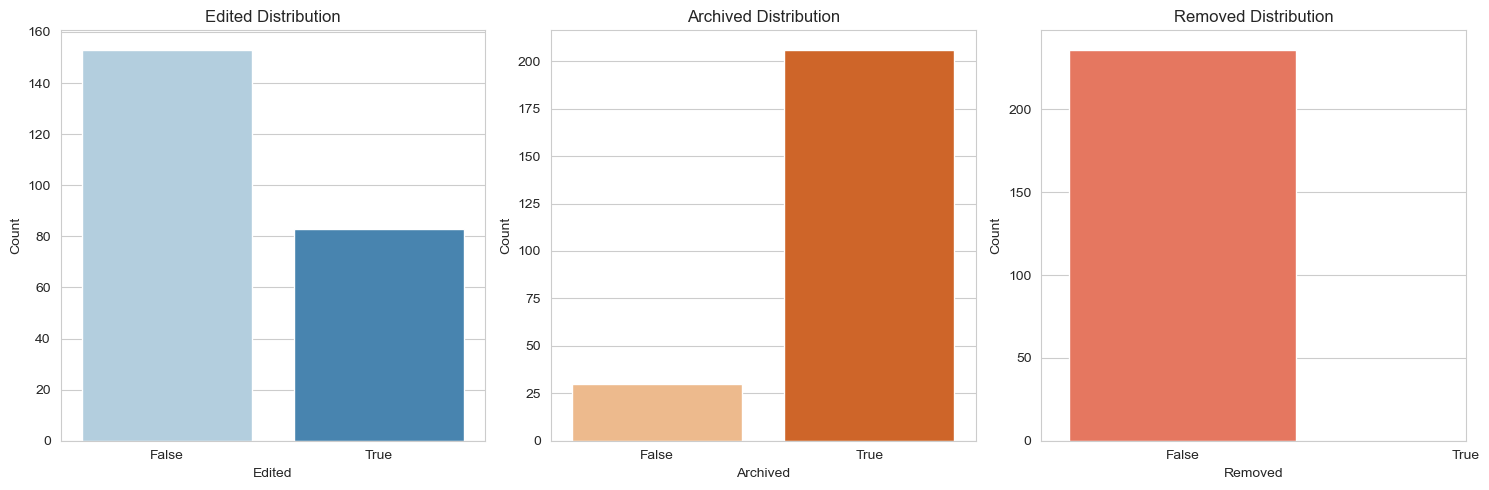

Top 5 Posts by Score:
                                                  title  score
205  CMV: Compared to other developed nations, Amer...  19501
210  CMV: PragerU should not be allowed to call its...  11080
217  CMV: The problem isn't that Lizard People are ...  10073
197  CMV: If you are still talking about Hillary Cl...   5633
206  CMV: there should be real-time, third-party fa...   5488

Top 5 Posts by Number of Comments:
                                                  title  num_comments
205  CMV: Compared to other developed nations, Amer...          2964
5    CMV: I don"t really understand why people care...          2792
210  CMV: PragerU should not be allowed to call its...          1461
229  CMV: Abortion is a red herring political issue...          1456
234  CMV: Gun Control in the United States is a los...          1259

Top 5 Posts by Upvote Ratio:
                                                  title  upvote_ratio
209  CMV: regardless of how you feel you climate ch...

In [155]:
required_columns = ['score', 'upvote_ratio', 'num_comments', 'title']
check_columns(submissions_df, required_columns)

# Plot the distribution of engagement metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(submissions_df['score'], kde=True, color='blue')
plt.title('Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(submissions_df['upvote_ratio'], kde=True, color='red')
plt.title('Upvote Ratio Distribution')

plt.subplot(1, 3, 3)
sns.histplot(submissions_df['num_comments'], kde=True, color='green')
plt.title('Number of Comments Distribution')

# Plot the distribution of 'edited', 'archived', and 'removed'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=submissions_df['edited'].value_counts().index, y=submissions_df['edited'].value_counts().values, palette='Blues')
plt.title('Edited Distribution')
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('Edited')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.barplot(x=submissions_df['archived'].value_counts().index, y=submissions_df['archived'].value_counts().values, palette='Oranges')
plt.title('Archived Distribution')
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('Archived')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.barplot(x=submissions_df['removed'].value_counts().index, y=submissions_df['removed'].value_counts().values, palette='Reds')
plt.title('Removed Distribution')
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('Removed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Top posts based on score, comments, and upvote ratio
top_scores = submissions_df.nlargest(5, 'score')
top_comments = submissions_df.nlargest(5, 'num_comments')
top_upvote_ratios = submissions_df.nlargest(5, 'upvote_ratio')
    
print("Top 5 Posts by Score:\n", top_scores[['title', 'score']])
print("\nTop 5 Posts by Number of Comments:\n", top_comments[['title', 'num_comments']])
print("\nTop 5 Posts by Upvote Ratio:\n", top_upvote_ratios[['title', 'upvote_ratio']])

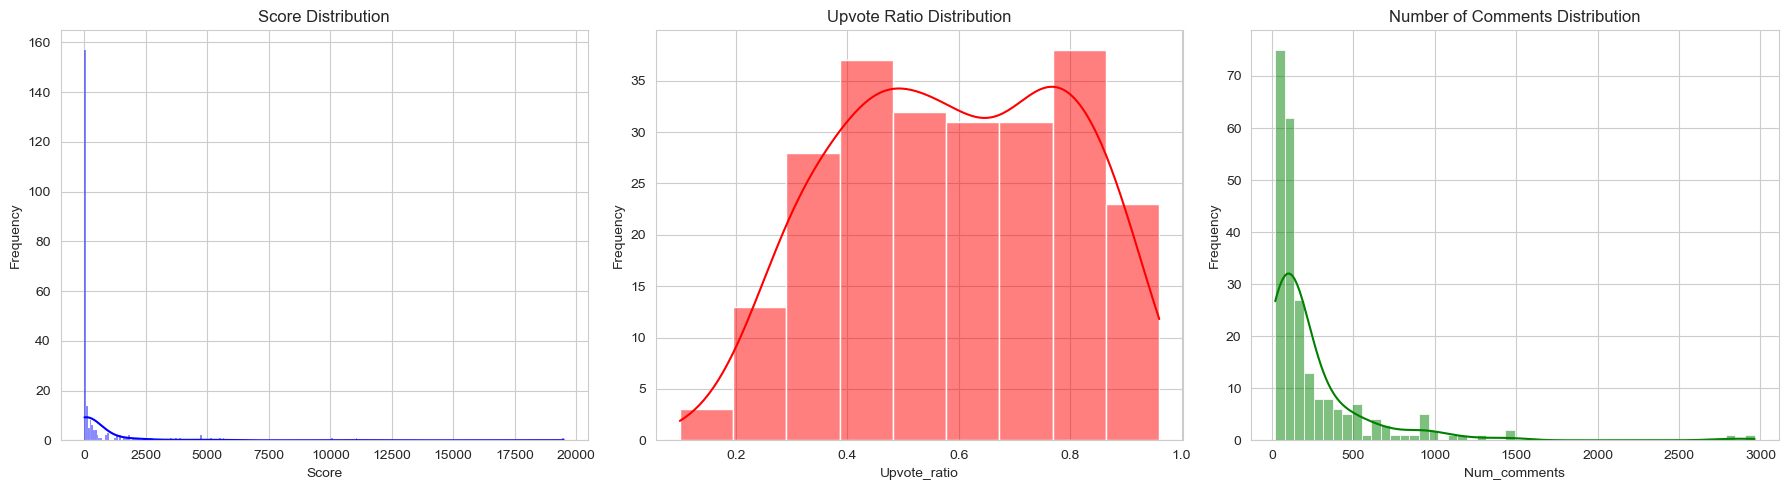

C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\816887354.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors[i], ax=axes[i])
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\816887354.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['False', 'True'])
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\816887354.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors[i], ax=axes[i])
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\816887354.py

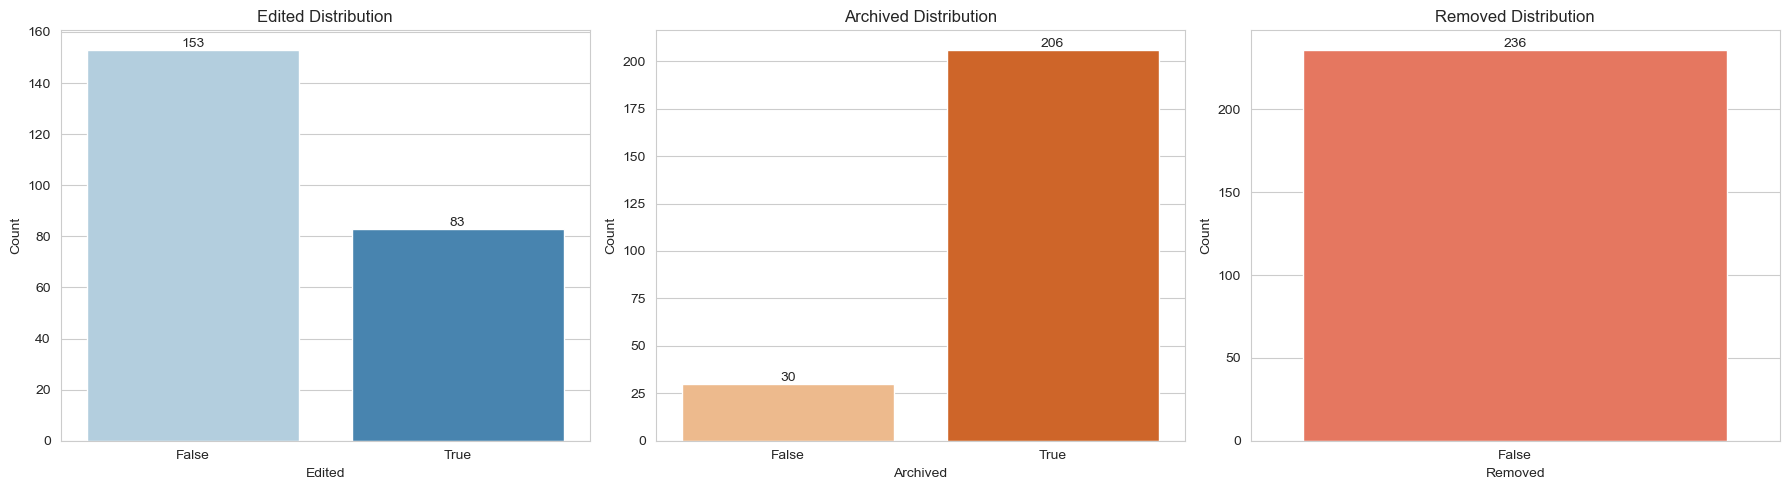


Top 5 Posts by Score:
                                                  title  score
205  CMV: Compared to other developed nations, Amer...  19501
210  CMV: PragerU should not be allowed to call its...  11080
217  CMV: The problem isn't that Lizard People are ...  10073
197  CMV: If you are still talking about Hillary Cl...   5633
206  CMV: there should be real-time, third-party fa...   5488

Top 5 Posts by Number of Comments:
                                                  title  num_comments
205  CMV: Compared to other developed nations, Amer...          2964
5    CMV: I don"t really understand why people care...          2792
210  CMV: PragerU should not be allowed to call its...          1461
229  CMV: Abortion is a red herring political issue...          1456
234  CMV: Gun Control in the United States is a los...          1259

Top 5 Posts by Upvote Ratio:
                                                  title  upvote_ratio
209  CMV: regardless of how you feel you climate ch..

In [156]:
#chatgpt improved

# Set style for consistent visualization
sns.set_style('whitegrid')

# Function to check required columns
def check_columns(df, required_columns):
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")

# Checking required columns
required_columns = ['score', 'upvote_ratio', 'num_comments', 'title', 'edited', 'archived', 'removed']
check_columns(submissions_df, required_columns)

# Plot the distribution of engagement metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
engagement_metrics = ['score', 'upvote_ratio', 'num_comments']
colors = ['blue', 'red', 'green']
titles = ['Score Distribution', 'Upvote Ratio Distribution', 'Number of Comments Distribution']

for i, metric in enumerate(engagement_metrics):
    sns.histplot(submissions_df[metric], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(metric.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the distribution of boolean metrics ('edited', 'archived', 'removed') with data labels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
boolean_metrics = ['edited', 'archived', 'removed']
colors = ['Blues', 'Oranges', 'Reds']
titles = ['Edited Distribution', 'Archived Distribution', 'Removed Distribution']

for i, metric in enumerate(boolean_metrics):
    value_counts = submissions_df[metric].value_counts()
    bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors[i], ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xticklabels(['False', 'True'])
    axes[i].set_xlabel(metric.capitalize())
    axes[i].set_ylabel('Count')
    
    # Adding data labels on each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

# Top posts based on score, comments, and upvote ratio
top_scores = submissions_df.nlargest(5, 'score')
top_comments = submissions_df.nlargest(5, 'num_comments')
top_upvote_ratios = submissions_df.nlargest(5, 'upvote_ratio')

print("\nTop 5 Posts by Score:\n", top_scores[['title', 'score']])
print("\nTop 5 Posts by Number of Comments:\n", top_comments[['title', 'num_comments']])
print("\nTop 5 Posts by Upvote Ratio:\n", top_upvote_ratios[['title', 'upvote_ratio']])



Comment Analysis:
General statstics

In [157]:
comments_df['removed'].value_counts()

removed
removed    1242
deleted     955
Name: count, dtype: int64

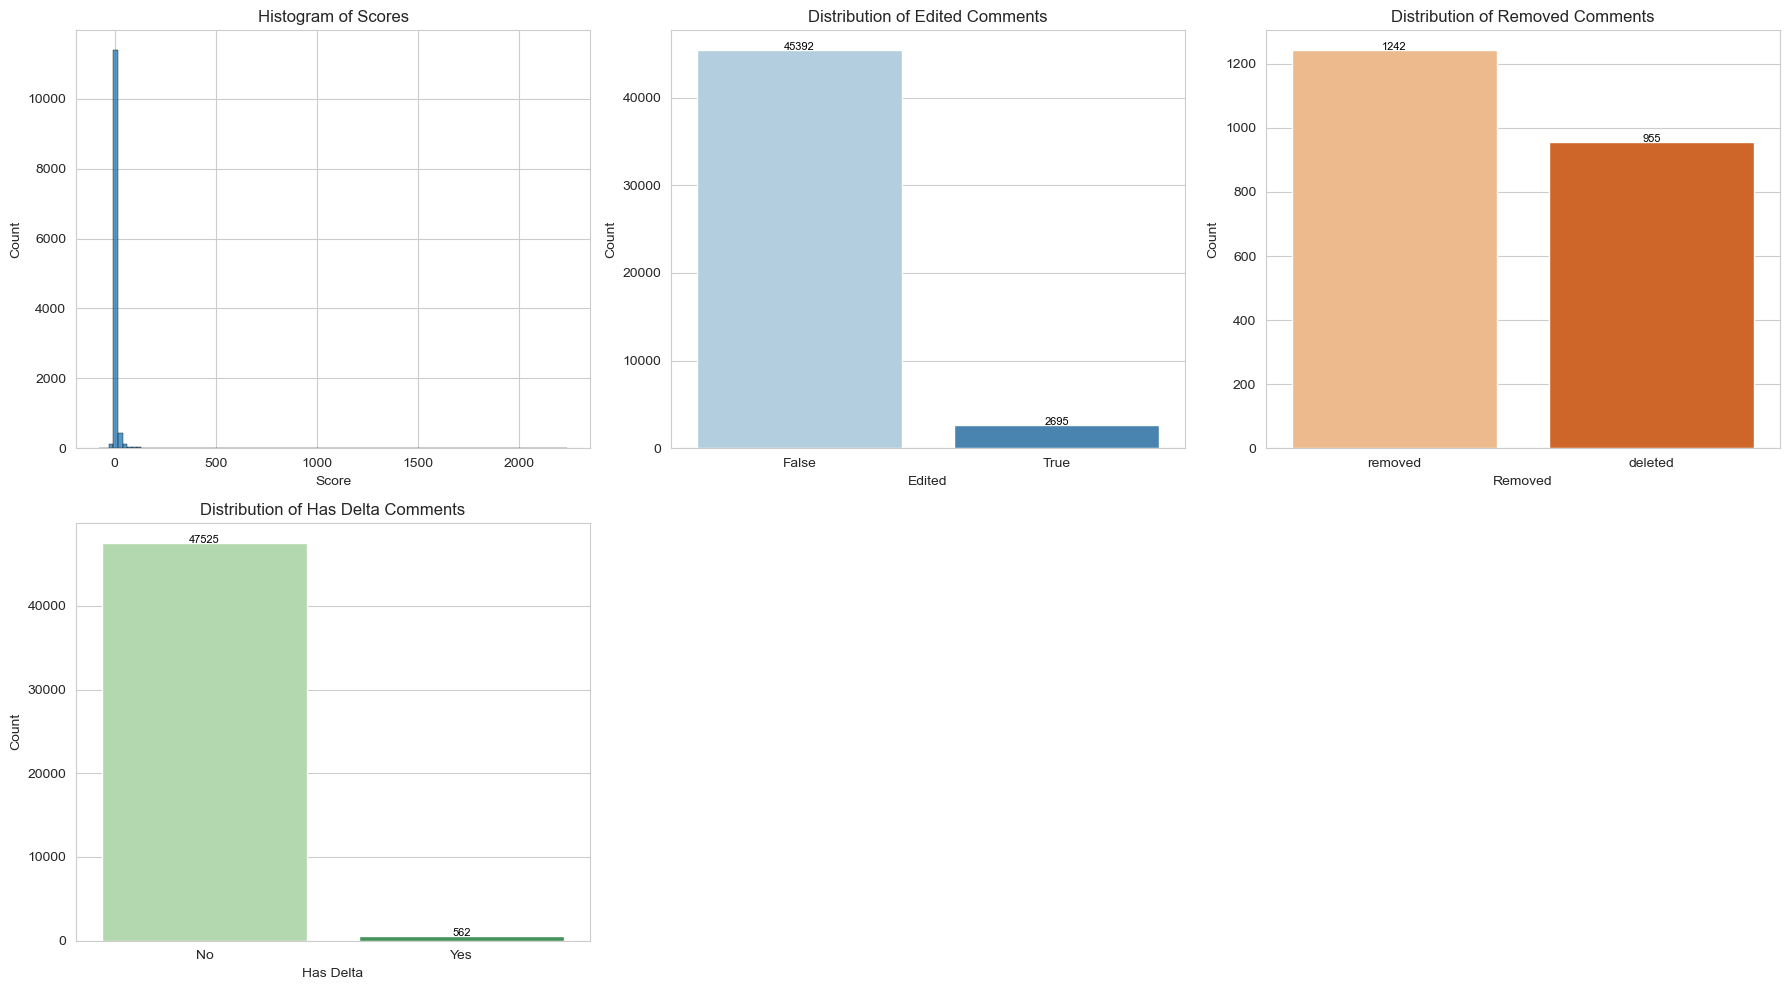

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Create a figure with subplots for better visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot the distribution of scores
sns.histplot(comments_df['score'], bins=100, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Histogram of Scores')

# Plot the distribution of the 'edited' column
sns.countplot(x='edited', hue='edited', data=comments_df, palette='Blues', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Edited Comments')
axes[0, 1].set_xlabel('Edited')
axes[0, 1].set_ylabel('Count')

# Add data labels for 'edited' countplot
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=8, color='black')

# Plot the distribution of the 'removed' column
sns.countplot(x='removed', hue='removed', data=comments_df, palette='Oranges', legend=False, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Removed Comments')
axes[0, 2].set_xlabel('Removed')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticks([0, 1])

# Add data labels for 'removed' countplot
for p in axes[0, 2].patches:
    axes[0, 2].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=8, color='black')

# Plot the distribution of the 'has_delta' column
sns.countplot(x='has_delta', hue='has_delta', data=comments_df, palette='Greens', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Has Delta Comments')
axes[1, 0].set_xlabel('Has Delta')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Add data labels for 'has_delta' countplot
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=8, color='black')

# Hide the extra subplots
axes[1, 1].axis('off')
axes[1, 2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


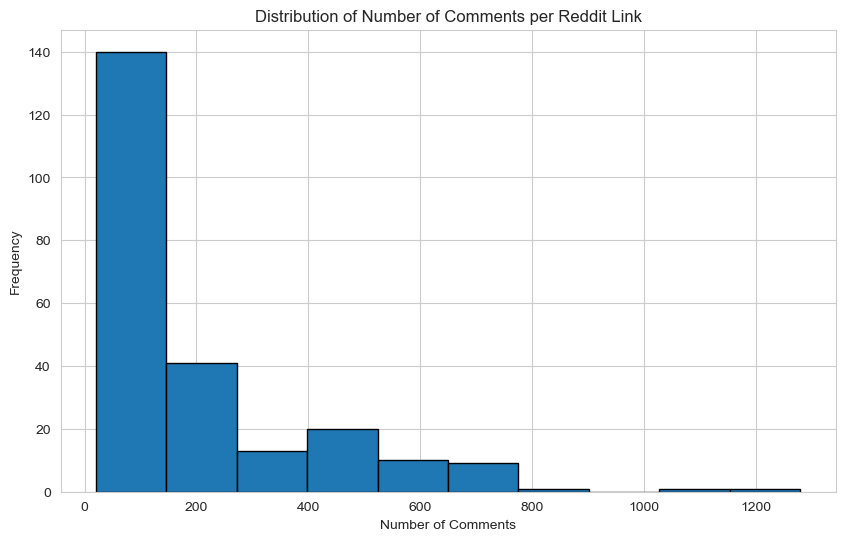

In [159]:
#Nr comments distribution from the distribution dataset.
grouped_data = comments_df.groupby('link_id').size().reset_index(name='num_comments')

# Histogram: Distribution of the number of comments per link
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['num_comments'], bins=10, edgecolor='black')
plt.title("Distribution of Number of Comments per Reddit Link")
plt.xlabel("Number of Comments")
plt.ylabel("Frequency")
plt.show()

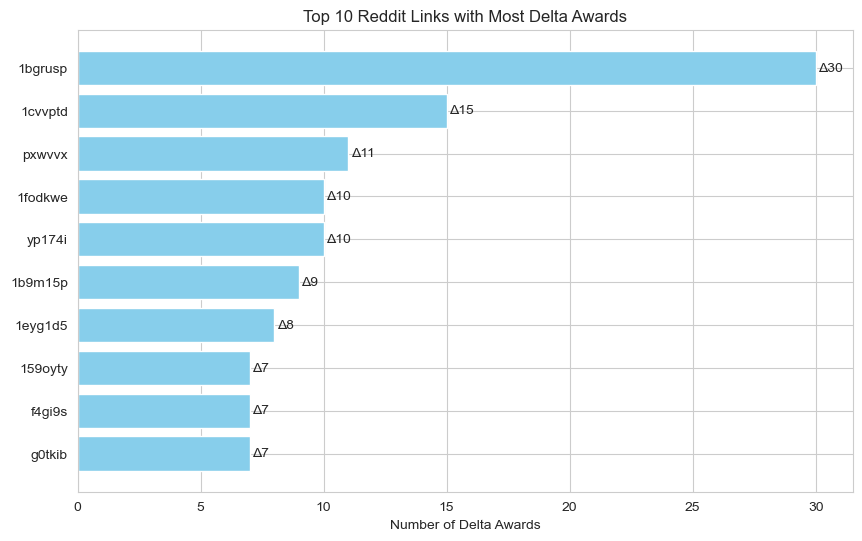

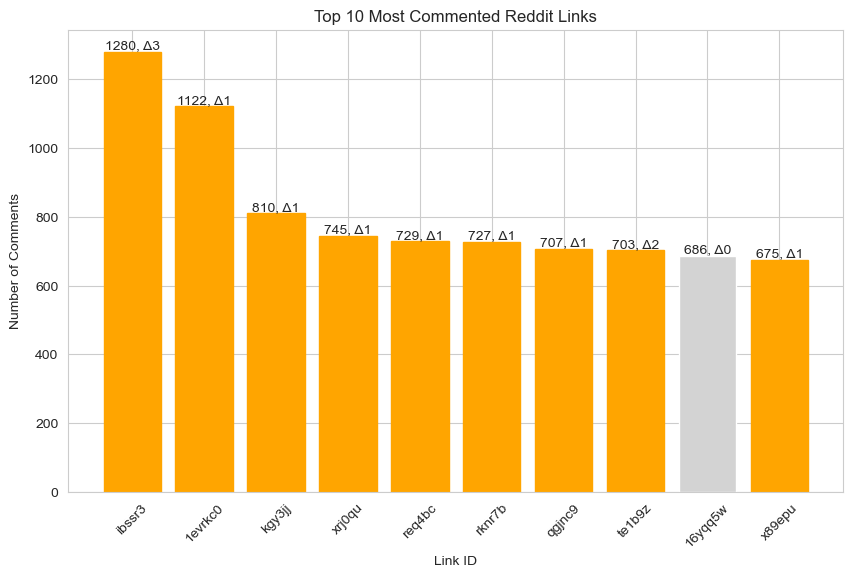

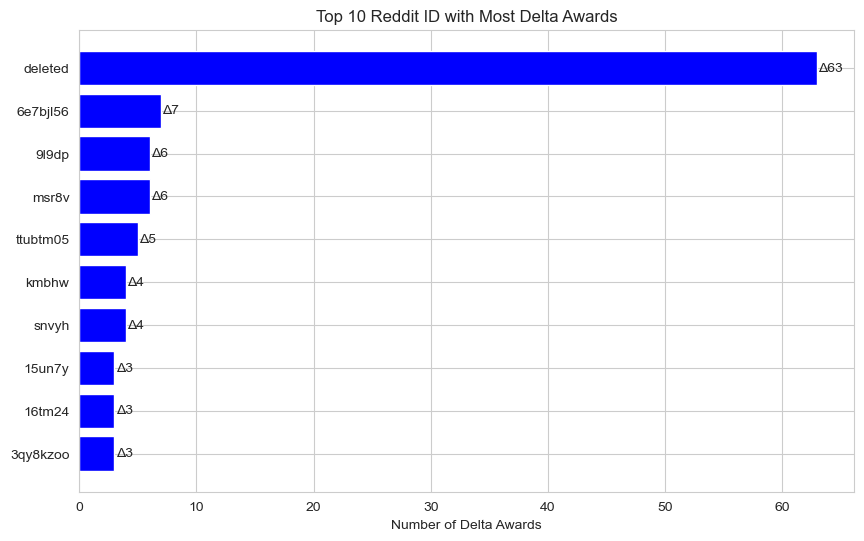

In [160]:
# Summarize by link_id for Delta awarded
delta_data = comments_df[comments_df['has_delta'] == 1].groupby('link_id').size().reset_index(name='delta_count')
top_delta_awarded = delta_data.nlargest(10, 'delta_count')

# Plot top 10 link_ids with most Delta awards
plt.figure(figsize=(10, 6))
delta_bars = plt.barh(top_delta_awarded['link_id'], top_delta_awarded['delta_count'], color='skyblue')
plt.xlabel("Number of Delta Awards")
plt.title("Top 10 Reddit Links with Most Delta Awards")

for bar, row in zip(delta_bars, top_delta_awarded.itertuples()):
    label = f"Δ{row.delta_count}"
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, 
             label, va='center', ha='left')

    
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

# Summarize by link_id for the most commented, with a highlight on Delta awarded
comment_data = comments_df.groupby('link_id').agg(
    num_comments=('link_id', 'size'),
    delta_awarded=('has_delta', 'sum')
).reset_index()
top_commented = comment_data.nlargest(10, 'num_comments')

# Plot most commented link_ids with highlight for Delta awards
plt.figure(figsize=(10, 6))
bars = plt.bar(top_commented['link_id'], top_commented['num_comments'], color='lightgrey')
plt.title("Top 10 Most Commented Reddit Links")
plt.xlabel("Link ID")
plt.ylabel("Number of Comments")

for bar, row in zip(bars, top_commented.itertuples()):
    if row.delta_awarded > 0:
        bar.set_color('orange')  # Highlight in orange if Delta awarded
    label = f"{row.num_comments}, Δ{row.delta_awarded}"  # Format label as "comments, Δdeltas"
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             label, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

# Summarize by link_id for Delta awarded
delta_data = comments_df[comments_df['has_delta'] == 1].groupby('redditor_id').size().reset_index(name='delta_count')
top_delta_awarded = delta_data.nlargest(10, 'delta_count')

# Plot top 10 link_ids with most Delta awards
plt.figure(figsize=(10, 6))
delta_bars = plt.barh(top_delta_awarded['redditor_id'], top_delta_awarded['delta_count'], color='blue')
plt.xlabel("Number of Delta Awards")
plt.title("Top 10 Reddit ID with Most Delta Awards")

for bar, row in zip(delta_bars, top_delta_awarded.itertuples()):
    label = f"Δ{row.delta_count}"
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, 
             label, va='center', ha='left')

    
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()


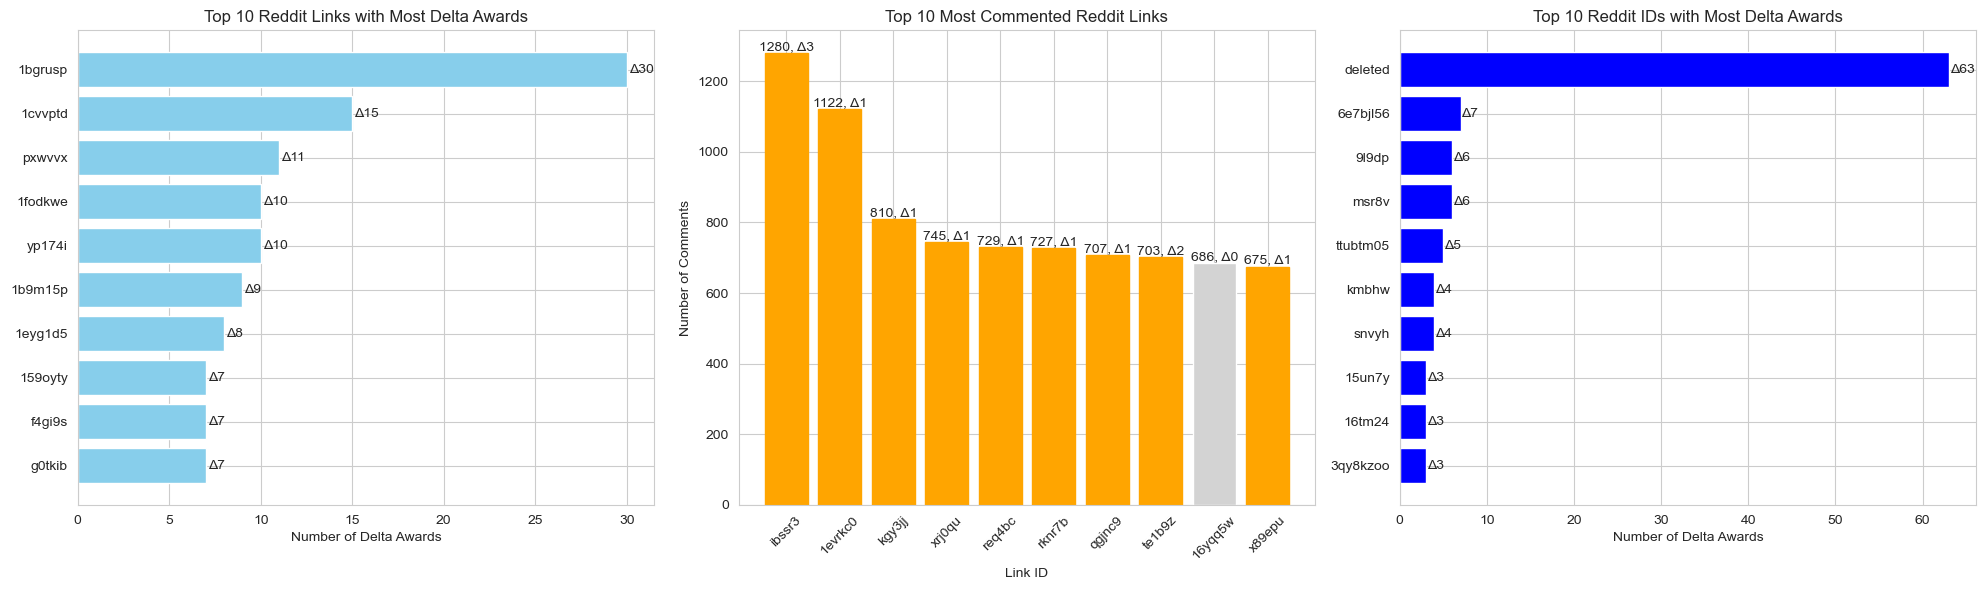

In [161]:
import matplotlib.pyplot as plt

# Create a 1x3 grid for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Top 10 Reddit Links with Most Delta Awards
delta_data = comments_df[comments_df['has_delta'] == 1].groupby('link_id').size().reset_index(name='delta_count')
top_delta_awarded = delta_data.nlargest(10, 'delta_count')

delta_bars = axes[0].barh(top_delta_awarded['link_id'], top_delta_awarded['delta_count'], color='skyblue')
axes[0].set_xlabel("Number of Delta Awards")
axes[0].set_title("Top 10 Reddit Links with Most Delta Awards")

for bar, row in zip(delta_bars, top_delta_awarded.itertuples()):
    label = f"Δ{row.delta_count}"
    axes[0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')

axes[0].invert_yaxis()  # Invert y-axis to show the highest at the top

# Plot 2: Top 10 Most Commented Reddit Links with Delta Highlight
comment_data = comments_df.groupby('link_id').agg(
    num_comments=('link_id', 'size'),
    delta_awarded=('has_delta', 'sum')
).reset_index()
top_commented = comment_data.nlargest(10, 'num_comments')

bars = axes[1].bar(top_commented['link_id'], top_commented['num_comments'], color='lightgrey')
axes[1].set_title("Top 10 Most Commented Reddit Links")
axes[1].set_xlabel("Link ID")
axes[1].set_ylabel("Number of Comments")

for bar, row in zip(bars, top_commented.itertuples()):
    if row.delta_awarded > 0:
        bar.set_color('orange')  # Highlight in orange if Delta awarded
    label = f"{row.num_comments}, Δ{row.delta_awarded}"  # Format label as "comments, Δdeltas"
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Top 10 Reddit IDs with Most Delta Awards
delta_data_user = comments_df[comments_df['has_delta'] == 1].groupby('redditor_id').size().reset_index(name='delta_count')
top_delta_awarded_user = delta_data_user.nlargest(10, 'delta_count')

delta_bars_user = axes[2].barh(top_delta_awarded_user['redditor_id'], top_delta_awarded_user['delta_count'], color='blue')
axes[2].set_xlabel("Number of Delta Awards")
axes[2].set_title("Top 10 Reddit IDs with Most Delta Awards")

for bar, row in zip(delta_bars_user, top_delta_awarded_user.itertuples()):
    label = f"Δ{row.delta_count}"
    axes[2].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')

axes[2].invert_yaxis()  # Invert y-axis to show the highest at the top

plt.tight_layout()
plt.show()


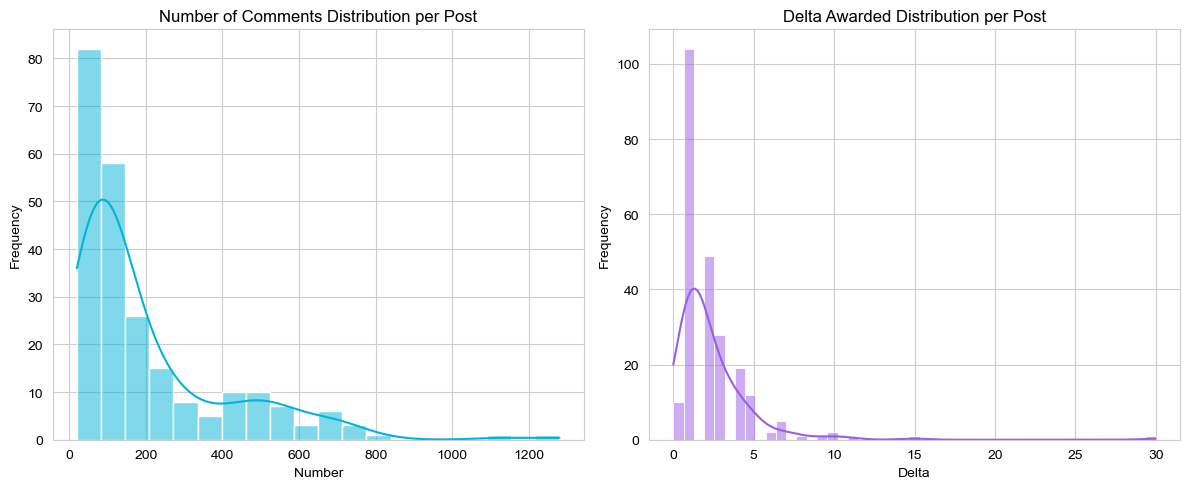

In [162]:
# Plot the distribution of engagement metrics
import matplotlib.pyplot as plt
import seaborn as sns

comment_data_per_post = comments_df.groupby('link_id').agg(
    num_comments=('link_id', 'size'),
    delta_awarded=('has_delta', 'sum')
).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('white')  # Set background color for the entire figure

# Define the metrics and data sources for each plot
engagement_metrics = [comment_data_per_post['num_comments'], 
                      comment_data_per_post['delta_awarded']]
colors = ['#00b4d8', '#9b5de5']  # Use light blue and purple colors
titles = ['Number of Comments Distribution per Post', 
          'Delta Awarded Distribution per Post']

# Loop to create each plot
for i, (metric, title) in enumerate(zip(engagement_metrics, titles)):
    axes[i].set_facecolor('white')  # Set background color for each subplot
    sns.histplot(metric, kde=True, color=colors[i], ax=axes[i], element='bars', fill=True)  # Solid color bars
    axes[i].set_title(title, color='black')
    axes[i].set_xlabel(title.split(' ')[0], color='black')  # Dynamically set label based on title
    axes[i].set_ylabel('Frequency', color='black')
    axes[i].tick_params(colors='black')  # Set tick color to black for visibility

plt.tight_layout()
plt.show()


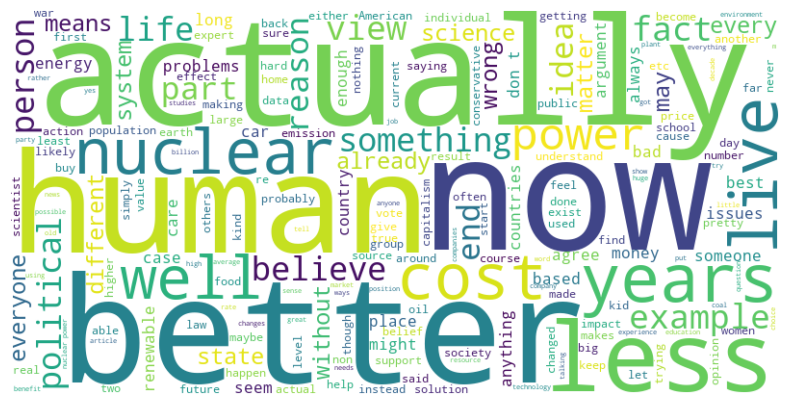

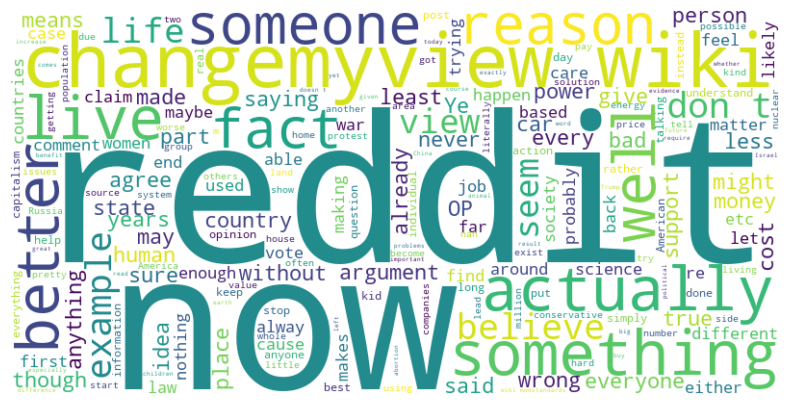

In [163]:
custom_stopwords = set(STOPWORDS).union({
    "people", "thing", "one", "way", "make", "will", "think", "want", "climate",
    "change", "year", "government", "issue", "problem", "say", "get", "know",
    "go", "see", "look", "come", "time", "use", "take", "even", "world", "point", "really" ,"lot", "work",
    "good", "right", "need", "https", "www", "much", "many", "like", "S", "U", "US","things","going","new","mean","still"
})    
# Filter for Delta-awarded comments
delta_comments = comments_df[comments_df['has_delta'] == 1]['body']

# Concatenate all Delta-awarded comments into a single text
text = ' '.join(delta_comments.astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords,colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Filter for Delta-awarded comments
delta_comments = comments_df[comments_df['has_delta'] != 1]['body']

# Concatenate all Delta-awarded comments into a single text
text = ' '.join(delta_comments.astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

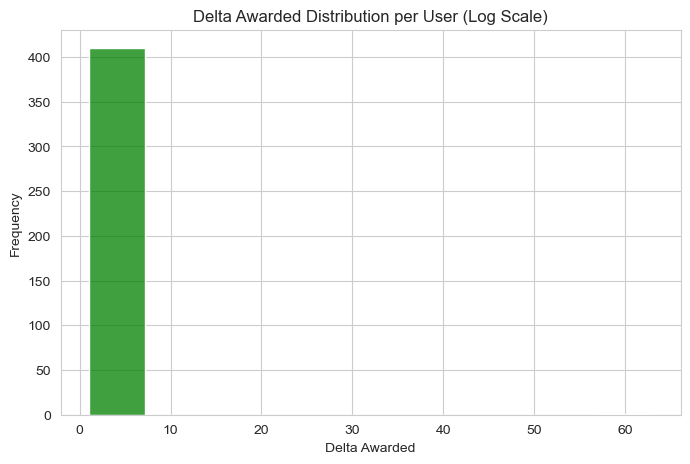

In [164]:
# Delta Awarded Distribution per User with Logarithmic Scale
comment_data_per_user = comments_df.groupby('redditor_id').agg(
    delta_awarded=('has_delta', 'sum')
).reset_index()

# Filter out users with zero deltas if desired
filtered_data = comment_data_per_user[comment_data_per_user['delta_awarded'] > 0]

plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['delta_awarded'],  color='green')
plt.title('Delta Awarded Distribution per User (Log Scale)')
plt.xlabel('Delta Awarded')
plt.ylabel('Frequency')
plt.show()


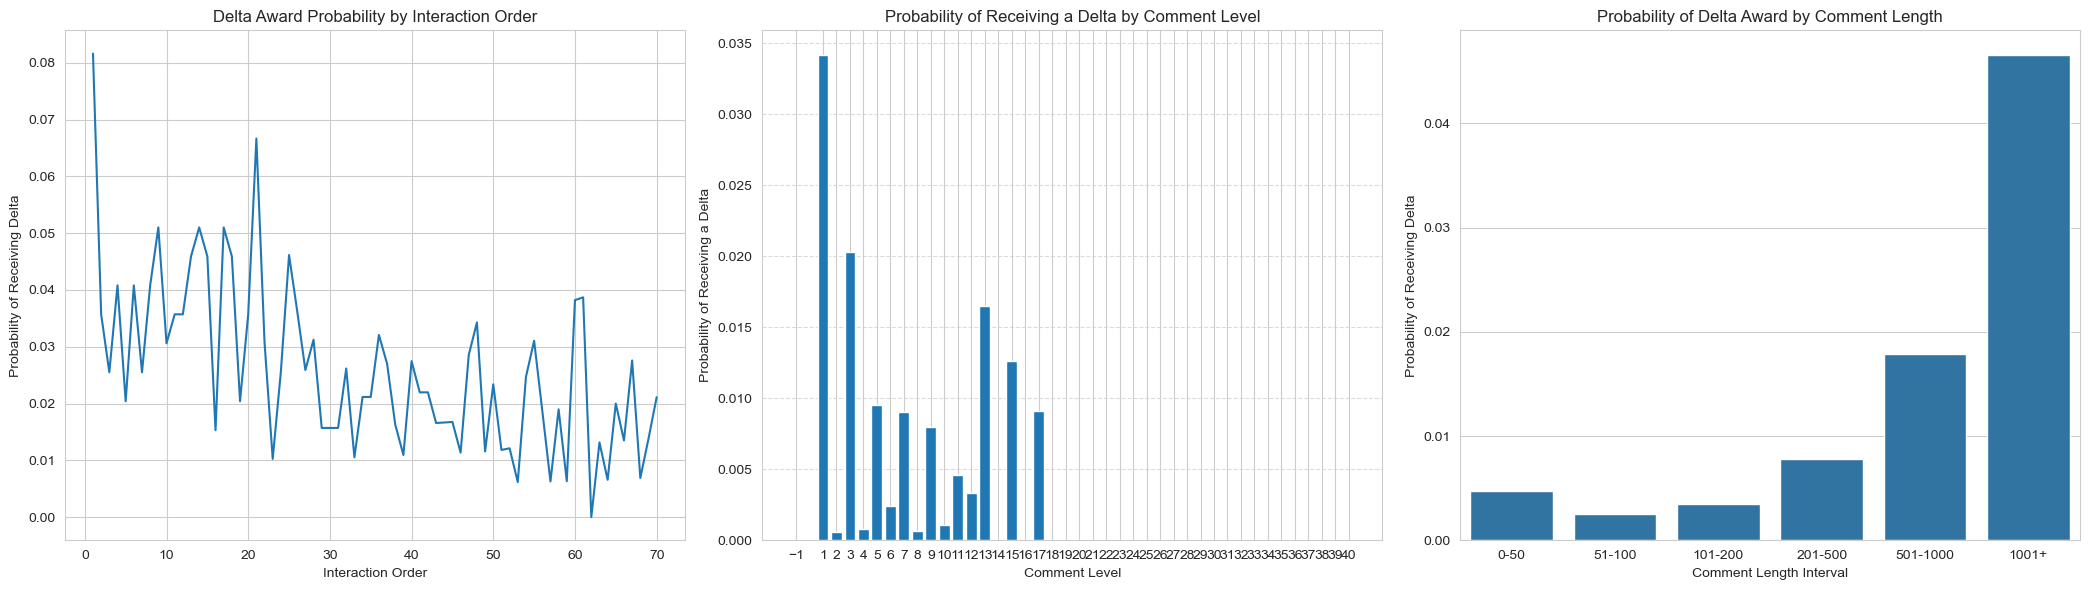

In [165]:
# Plot delta probability by interaction order, comment level, and comment length side by side
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort and process data for interaction order
comments_df = comments_df.sort_values(by=['link_id', 'created_at']).dropna(subset=['created_at'])
comments_df['interaction_order'] = comments_df.groupby('link_id').cumcount() + 1
delta_prob_by_order = comments_df.groupby('interaction_order')['has_delta'].mean().reset_index()
delta_prob_by_order = delta_prob_by_order[delta_prob_by_order['interaction_order'] <= 70]  # Focus on first 70 interactions

# Calculate probability of delta by comment level
comments_df['level'] = -1
comments_df.loc[(comments_df['parent_id_clean'] == comments_df['link_id']), 'level'] = 1

current_level = 1
while True:
    current_level_ids = comments_df.loc[comments_df['level'] == current_level, 'comment_id'].tolist()
    if not current_level_ids:
        break
    comments_df.loc[(comments_df['parent_id_clean'].isin(current_level_ids)) & (comments_df['level'] == -1), 'level'] = current_level + 1
    current_level += 1
delta_prob_by_level = comments_df.groupby('level')['has_delta'].mean().reset_index()
delta_prob_by_level.columns = ['level', 'delta_probability']

# Calculate probability of delta by comment length
comments_df['comment_length'] = comments_df['body'].astype(str).apply(len)
length_bins = pd.cut(comments_df['comment_length'], bins=[0, 50, 100, 200, 500, 1000, float('inf')],
                     labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1001+'])
delta_prob_by_length = comments_df.groupby(length_bins, observed=False)['has_delta'].mean().reset_index()

# Set up the plots side by side
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Plot 1: Delta probability by interaction order
sns.lineplot(x='interaction_order', y='has_delta', data=delta_prob_by_order, ax=axes[0])
axes[0].set_xlabel('Interaction Order')
axes[0].set_ylabel('Probability of Receiving Delta')
axes[0].set_title('Delta Award Probability by Interaction Order')

# Plot 2: Probability of delta by comment level
axes[1].bar(delta_prob_by_level['level'], delta_prob_by_level['delta_probability'])
axes[1].set_xlabel('Comment Level')
axes[1].set_ylabel('Probability of Receiving a Delta')
axes[1].set_title('Probability of Receiving a Delta by Comment Level')
axes[1].set_xticks(delta_prob_by_level['level'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Probability of delta by comment length
sns.barplot(x='comment_length', y='has_delta', data=delta_prob_by_length, ax=axes[2])
axes[2].set_xlabel('Comment Length Interval')
axes[2].set_ylabel('Probability of Receiving Delta')
axes[2].set_title('Probability of Delta Award by Comment Length')

plt.tight_layout()
plt.show()


In [166]:
print(submissions_df['created_at'].isna().value_counts())
print(pd.crosstab(submissions_df['created_at'].isna(), submissions_df['archived'], margins=True))

created_at
False    196
True      40
Name: count, dtype: int64
archived    False  True  All
created_at                  
False          30   166  196
True            0    40   40
All            30   206  236


C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\1360104.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_df_tf['hour'] = submissions_df_tf['created_at'].dt.hour
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\1360104.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_df_tf['day'] = submissions_df_tf['created_at'].dt.dayofweek.astype(int)  # Ensure 'day' is an integer
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\1360104.py:14: SettingWithCopyWarning: 
A value is trying to 

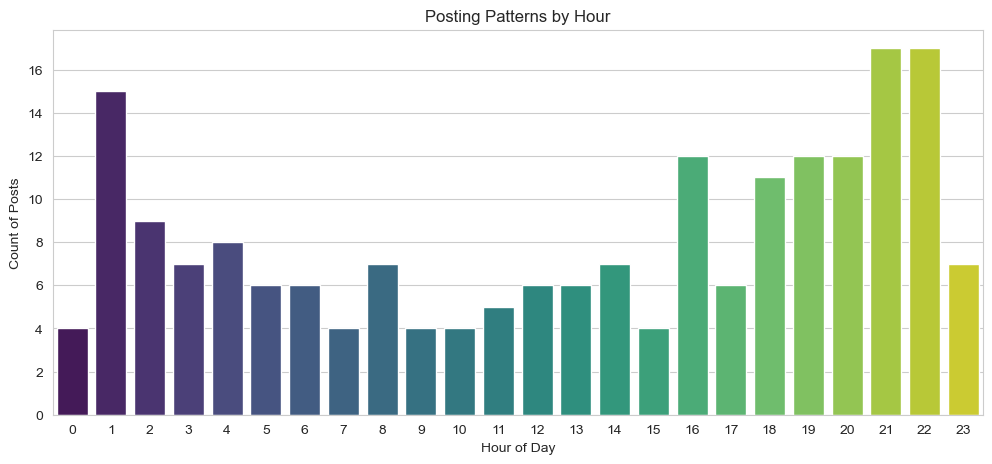

C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\1360104.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=submissions_df_tf, palette='viridis', order=list(calendar.day_name))


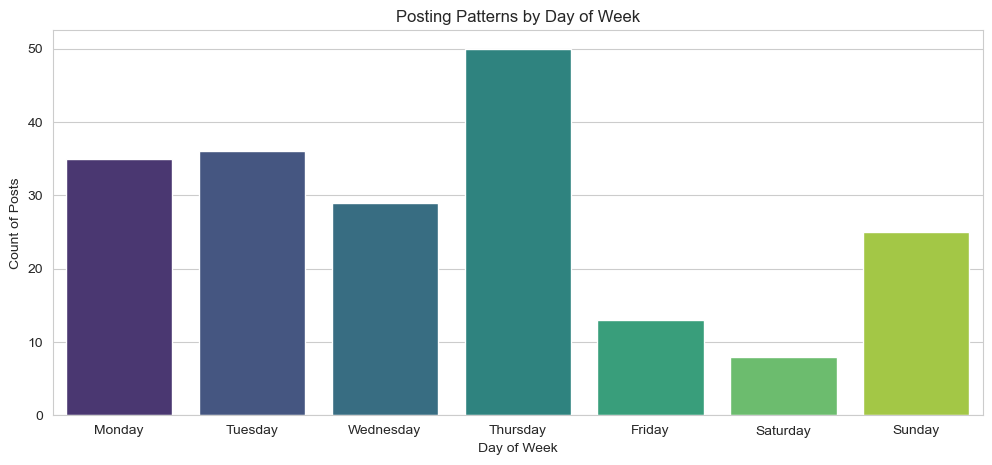

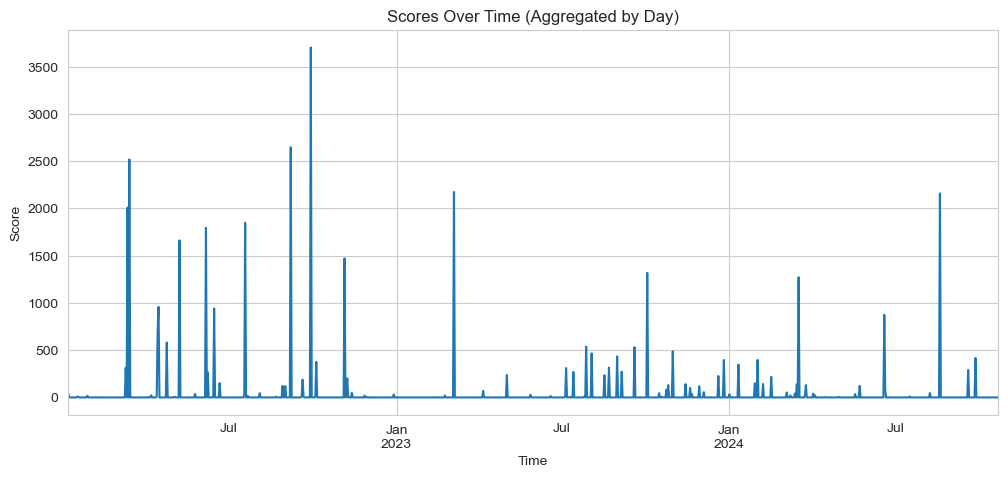

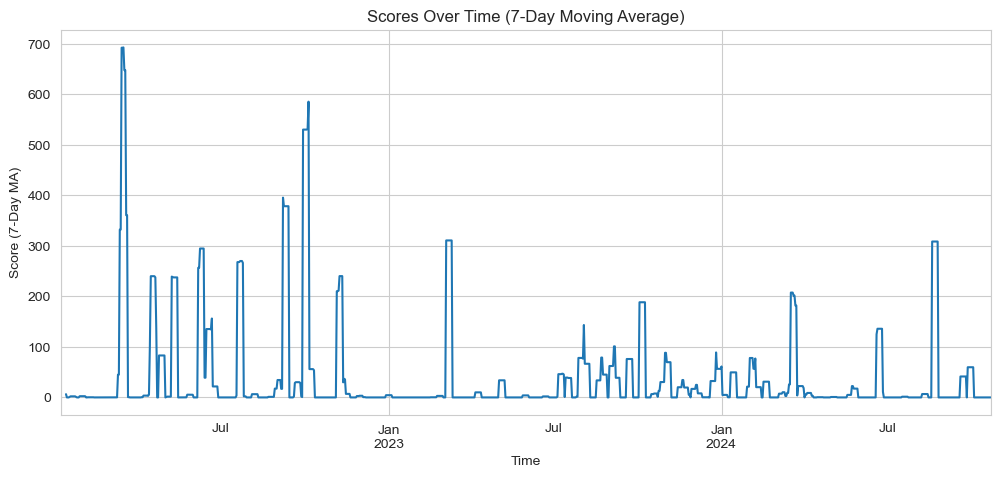

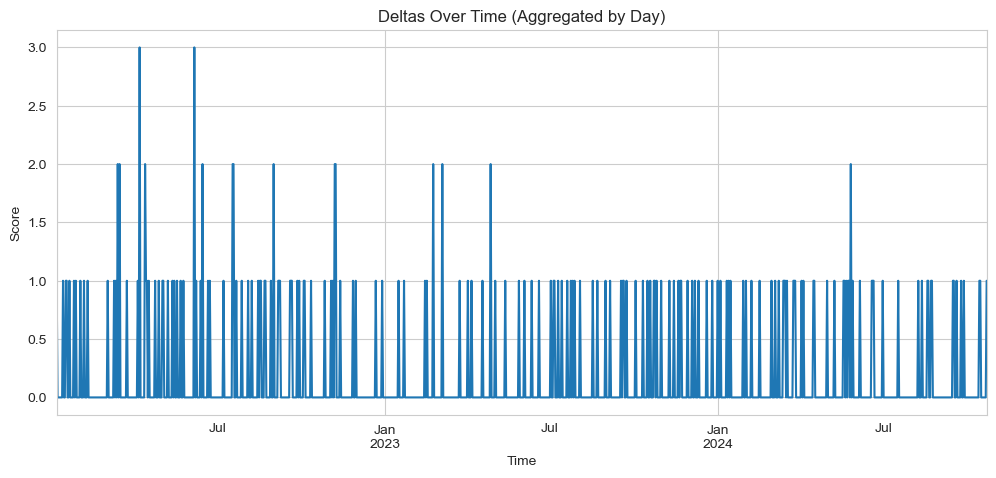

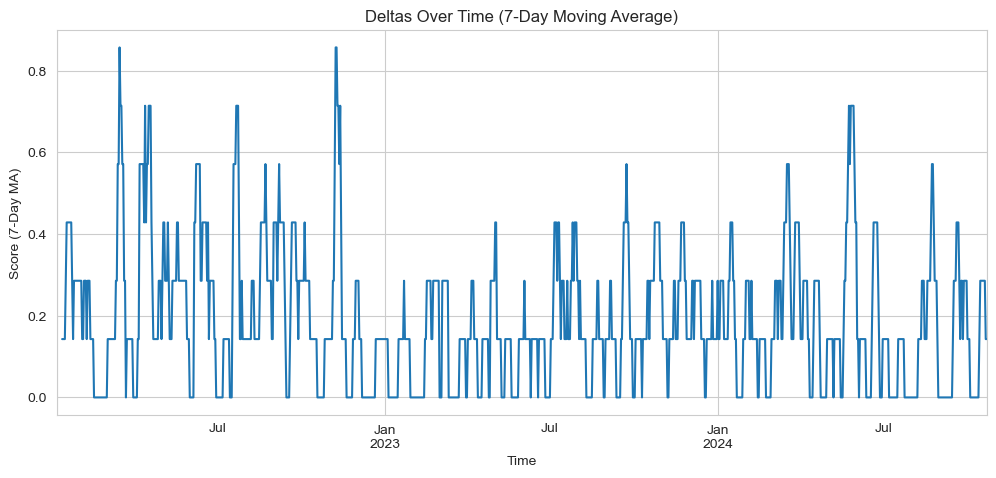

In [167]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Temporal Analysis
required_columns = ['created_at', 'score']
check_columns(submissions_df, required_columns)

submissions_df_tf = submissions_df.dropna(subset=['created_at', 'score'])

# Extract hour and weekday names
submissions_df_tf['hour'] = submissions_df_tf['created_at'].dt.hour
submissions_df_tf['day'] = submissions_df_tf['created_at'].dt.dayofweek.astype(int)  # Ensure 'day' is an integer
submissions_df_tf['weekday'] = submissions_df_tf['day'].apply(lambda x: calendar.day_name[x])

# Posting patterns by hour
plt.figure(figsize=(12, 5))
sns.countplot(x='hour', data=submissions_df_tf, palette='viridis')
plt.title('Posting Patterns by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Posts')
plt.show()

# Posting patterns by day of the week (using weekday names)
plt.figure(figsize=(12, 5))
sns.countplot(x='weekday', data=submissions_df_tf, palette='viridis', order=list(calendar.day_name))
plt.title('Posting Patterns by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Posts')
plt.show()

# Engagement over time - Aggregated by day
plt.figure(figsize=(12, 5))
daily_scores = submissions_df_tf.resample('D', on='created_at')['score'].sum()
daily_scores.plot()
plt.title('Scores Over Time (Aggregated by Day)')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

# Engagement over time - Moving Average (7-Day)
plt.figure(figsize=(12, 5))
daily_scores.rolling(window=7).mean().plot()
plt.title('Scores Over Time (7-Day Moving Average)')
plt.xlabel('Time')
plt.ylabel('Score (7-Day MA)')
plt.show()

# Engagement over time - Aggregated by day
plt.figure(figsize=(12, 5))
daily_scores = submissions_df_tf.resample('D', on='created_at')['has_delta'].sum()
daily_scores.plot()
plt.title('Deltas Over Time (Aggregated by Day)')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

# Engagement over time - Moving Average (7-Day)
plt.figure(figsize=(12, 5))
daily_scores.rolling(window=7).mean().plot()
plt.title('Deltas Over Time (7-Day Moving Average)')
plt.xlabel('Time')
plt.ylabel('Score (7-Day MA)')
plt.show()



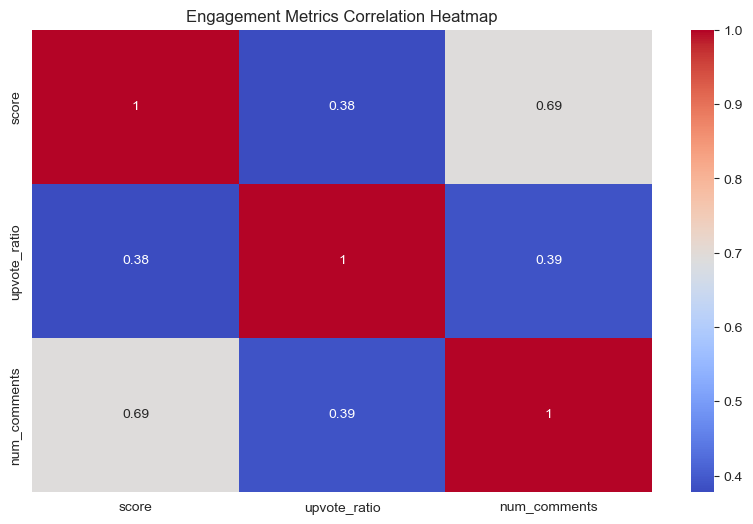

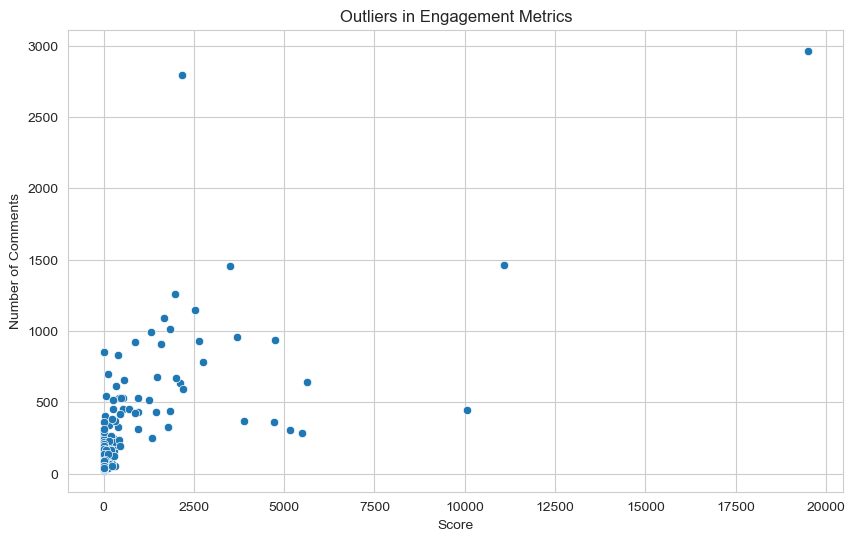

In [168]:

plt.figure(figsize=(10, 6))
sns.heatmap(submissions_df[['score', 'upvote_ratio', 'num_comments']].corr(), annot=True, cmap='coolwarm')
plt.title('Engagement Metrics Correlation Heatmap')
plt.show()

# Outliers in engagement metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='num_comments', data=submissions_df)
plt.title('Outliers in Engagement Metrics')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

WordCloud

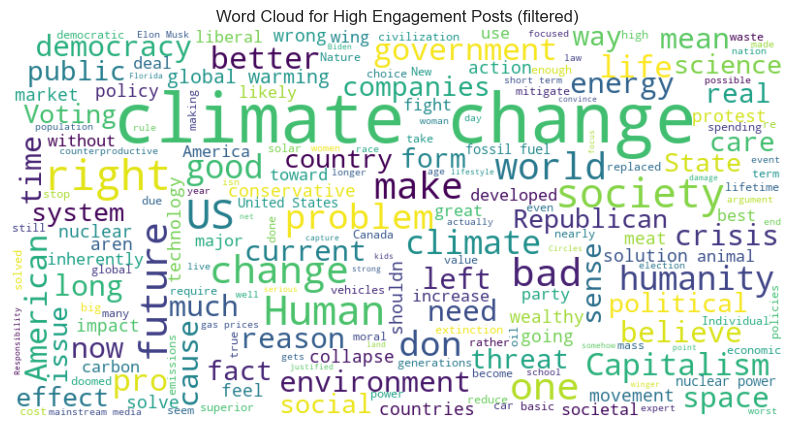

In [169]:
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["CMV", "will", "people", "really", "thing","t","S","think","U"])

text = ' '.join(submissions_df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for High Engagement Posts (filtered)')
plt.show()

In [170]:
comments_df['body'].dtypes

dtype('O')

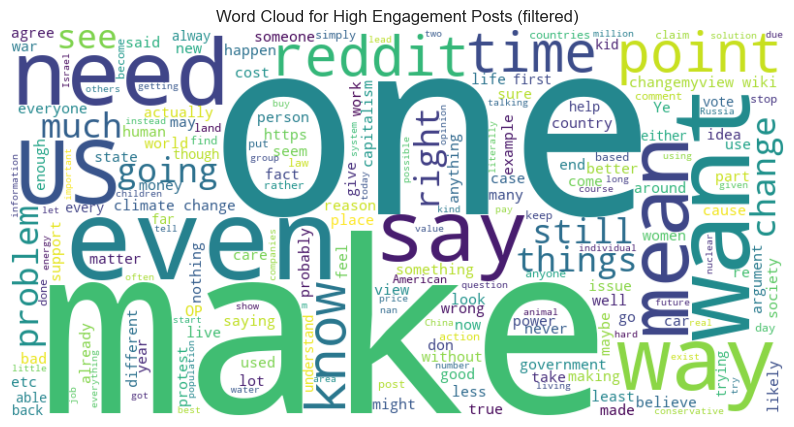

In [171]:
text = ' '.join(comments_df['body'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for High Engagement Posts (filtered)')
plt.show()

Delta Award Probability Analysis

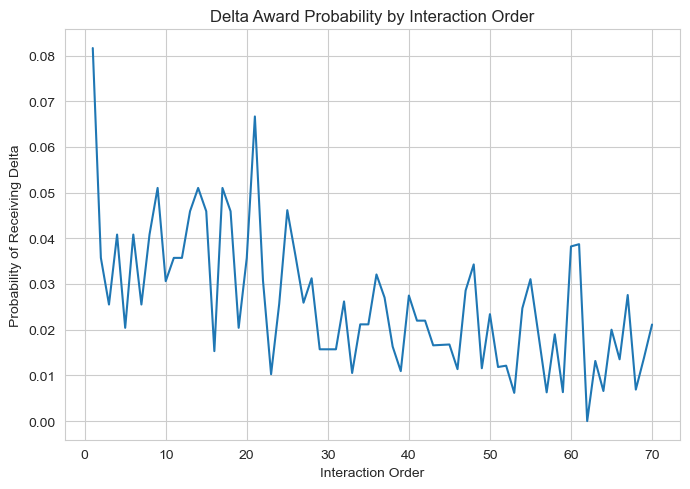

In [172]:
# Plot delta probability by interaction order
comments_df = comments_df.sort_values(by=['link_id', 'created_at']).dropna(subset=['created_at'])
comments_df['interaction_order'] = comments_df.groupby('link_id').cumcount() + 1
delta_prob_by_order = comments_df.groupby('interaction_order')['has_delta'].mean().reset_index()
delta_prob_by_order = delta_prob_by_order[delta_prob_by_order['interaction_order'] <= 70]  # Focus on first 10 interactions

fig, ax = plt.subplots(figsize=(7, 5))  # Create a single figure and axis
sns.lineplot(x='interaction_order', y='has_delta', data=delta_prob_by_order, ax=ax)
ax.set_xlabel('Interaction Order')
ax.set_ylabel('Probability of Receiving Delta')
ax.set_title('Delta Award Probability by Interaction Order')

plt.tight_layout()
plt.show()


In [173]:
#Probability of delta by comment level

comments_df['level'] = -1
comments_df.loc[(comments_df['parent_id_clean'] == comments_df['link_id']), 'level'] = 1

current_level = 1
levels_updated = True

while True:
    # Find all comment IDs at the current level
    current_level_ids = comments_df.loc[comments_df['level'] == current_level, 'comment_id'].tolist()
    if not current_level_ids:
        break

    # Assign the next level to comments whose link_ID matches any comment ID at the current level
    comments_df.loc[(comments_df['parent_id_clean'].isin(current_level_ids)) & (comments_df['level'] == -1), 'level'] = current_level + 1

    # Move to the next level
    current_level += 1

In [174]:
comments_df['level'].value_counts()

level
 1     7865
 2     5177
 3     5076
 4     3763
 5     3366
 6     2504
 7     2095
 8     1572
 9     1254
 10     932
 11     432
 12     298
 13     242
 14     185
 15     158
 16     140
 17     110
 18      90
-1       83
 19      62
 20      50
 21      37
 22      37
 26      35
 23      31
 25      28
 24      27
 27      25
 28      24
 29      18
 30      16
 31      11
 32       9
 34       6
 35       6
 33       6
 37       5
 36       4
 38       3
 39       1
 40       1
Name: count, dtype: int64

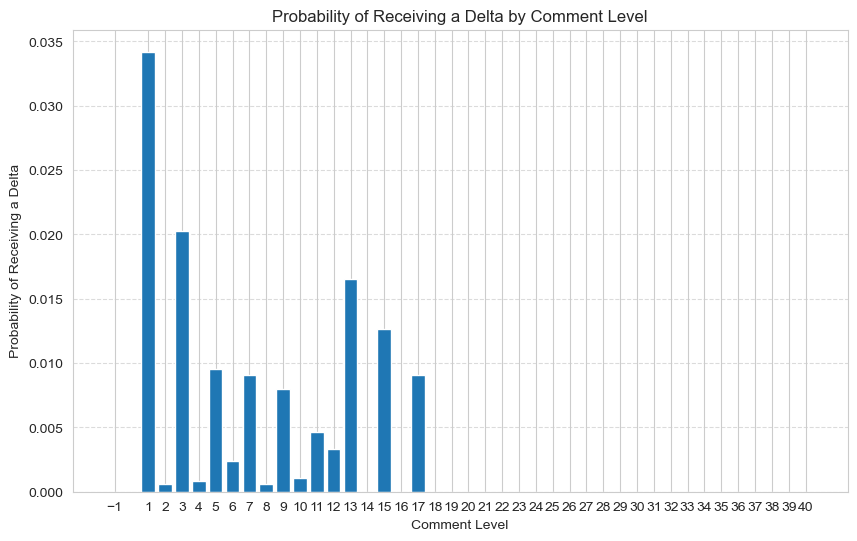

In [175]:
# Group by 'level' and calculate the mean of 'has_delta' for each level
delta_prob_by_level = comments_df.groupby('level')['has_delta'].mean().reset_index()

# Rename columns for clarity
delta_prob_by_level.columns = ['level', 'delta_probability']

plt.figure(figsize=(10, 6))
plt.bar(delta_prob_by_level['level'], delta_prob_by_level['delta_probability'])
plt.xlabel('Comment Level')
plt.ylabel('Probability of Receiving a Delta')
plt.title('Probability of Receiving a Delta by Comment Level')
plt.xticks(delta_prob_by_level['level'])  # Ensure correct x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

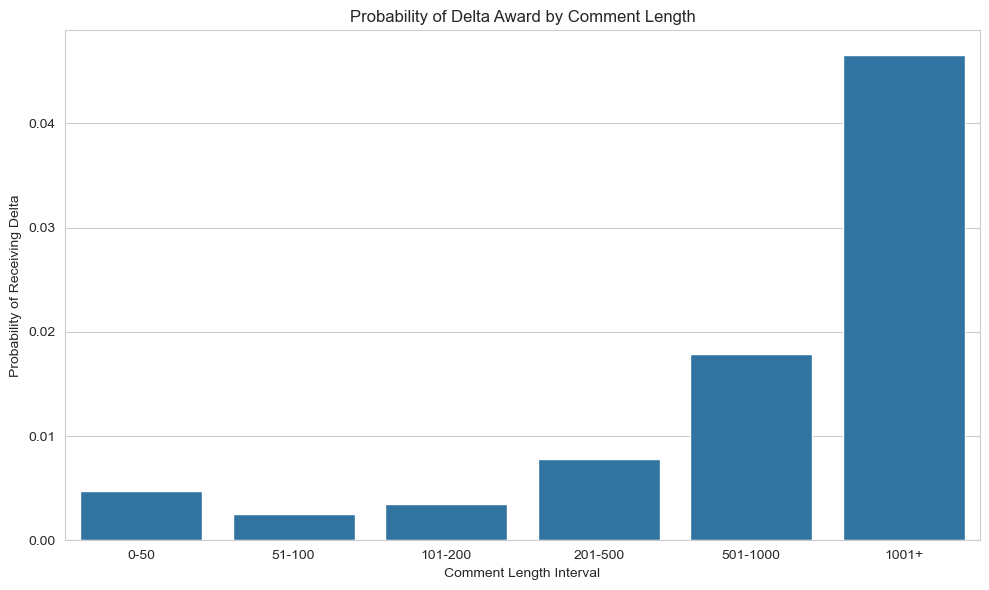

In [176]:
# Plot probability of delta by comment length
comments_df['comment_length'] = comments_df['body'].astype(str).apply(len)

# Define length bins for categorizing comment length
length_bins = pd.cut(comments_df['comment_length'], bins=[0, 50, 100, 200, 500, 1000, float('inf')],
                     labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1001+'])

# Calculate the probability of receiving a delta by comment length bins
delta_prob_by_length = comments_df.groupby(length_bins, observed=False)['has_delta'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='comment_length', y='has_delta', data=delta_prob_by_length, ax=ax)

# Labeling the plot
ax.set_xlabel('Comment Length Interval')
ax.set_ylabel('Probability of Receiving Delta')
ax.set_title('Probability of Delta Award by Comment Length')

# Show the plot
plt.tight_layout()
plt.show()

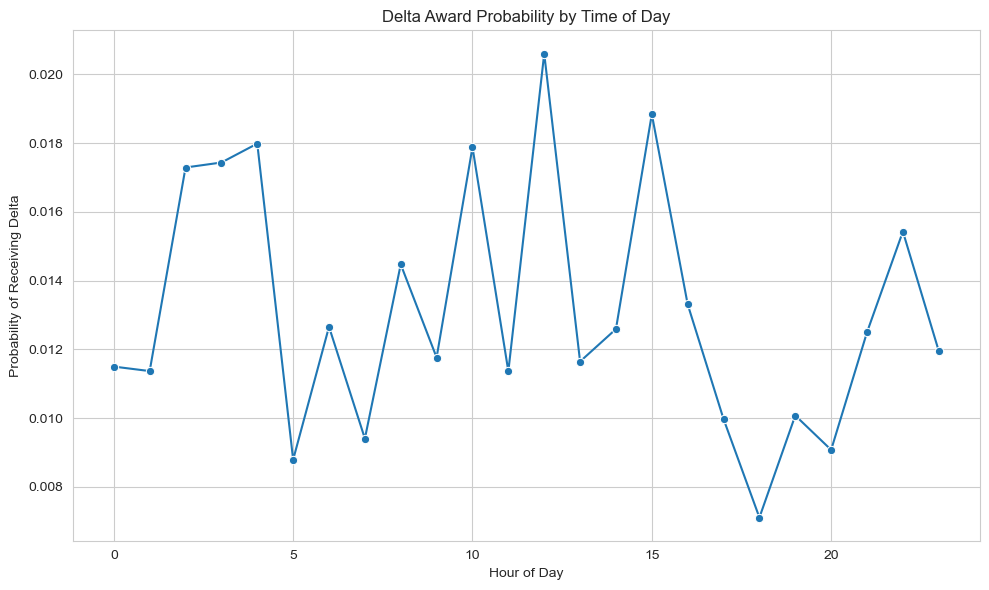

In [177]:
# Plot probability of delta by hour
comments_df['hour'] = comments_df['created_at'].dt.hour
delta_prob_by_hour = comments_df.groupby('hour')['has_delta'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='has_delta', data=delta_prob_by_hour, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Probability of Receiving Delta')
plt.title('Delta Award Probability by Time of Day')
plt.tight_layout()
plt.show()


C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\501789974.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delta_prob_by_experience = comments_df.groupby(experience_bins)['has_delta'].mean().reset_index()
C:\Users\dbhal\AppData\Local\Temp\ipykernel_4024\501789974.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='redditor_experience', y='has_delta', data=delta_prob_by_experience, palette='coolwarm')


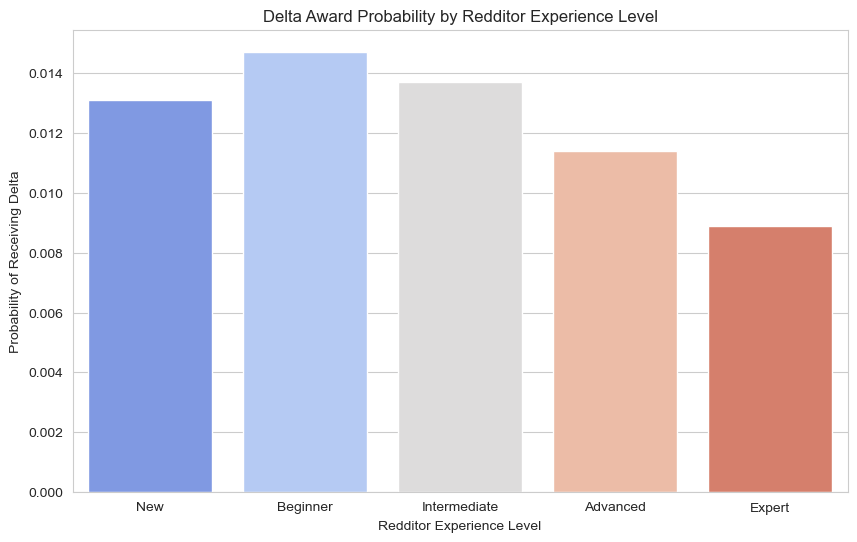

In [178]:
# Plot probability of delta by Redditor experience
#Experience is defined as the total number of comments made by a Redditor (level of activity on the platform)
comments_df['redditor_experience'] = comments_df.groupby('redditor_id')['redditor_id'].transform('count')
experience_bins = pd.cut(comments_df['redditor_experience'], bins=[0, 5, 20, 50, 100, float('inf')], labels=['New', 'Beginner', 'Intermediate', 'Advanced', 'Expert'])
delta_prob_by_experience = comments_df.groupby(experience_bins)['has_delta'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='redditor_experience', y='has_delta', data=delta_prob_by_experience, palette='coolwarm')
plt.xlabel('Redditor Experience Level')
plt.ylabel('Probability of Receiving Delta')
plt.title('Delta Award Probability by Redditor Experience Level')

# Show the plot
plt.show()